<span style="font-size:24px; font-weight:bold;">Netflix Case study</span>

Business Problem :
Examine the data and produce valuable insights that could assist Netflix in determining the genres of shows/movies to create and devising strategies for business expansion across various countries.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape 

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Here the given Dataset has 8807 rows and 12 columns. Only release_year column has Datatype int64 and rest of the columns have object datatype.

<span style="font-size:15px; font-weight:bold;">Handling Missing Values</span>

In [8]:
#detecting missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#replacing missing values with suitable titles
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown Actor',inplace = True)
df['country'].fillna('Unknown',inplace = True)

In [10]:
# Dropping null date_added values
df.dropna(subset = ['date_added'],axis = 0 ,inplace = True)

In [11]:
df.shape

(8797, 12)

<span style="font-size:15px; font-weight:bold;">Unique Attributes</span>

In [12]:
df.nunique() 

show_id         8797
type               2
title           8797
director        4529
cast            7683
country          749
date_added      1767
release_year      74
rating            17
duration         220
listed_in        513
description     8765
dtype: int64

In [13]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [14]:
df['director'].value_counts()

Unknown Director                  2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [15]:
df['country'].value_counts()

United States                             2812
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [16]:
df['listed_in'].value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

In [17]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<span style="font-size:15px; font-weight:bold;">Movies Vs TV Shows</span>

In [18]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

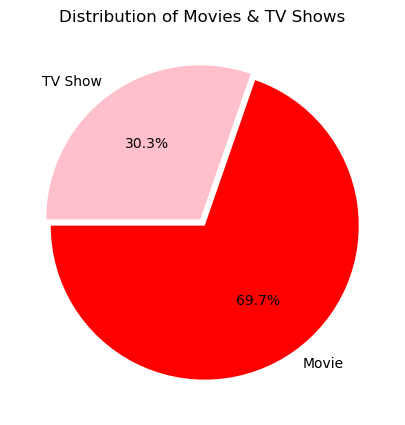

In [19]:
plt.figure(figsize =(10,5))
plt.title("Distribution of Movies & TV Shows")
g=plt.pie(df['type'].value_counts(),explode=(0.025,0.025),
labels=df['type'].value_counts().index, colors=['red','pink'],autopct='%1.1f%%',
startangle=180)

In [20]:
df[df['type'] == 'Movie']['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [21]:
df[df['type'] == 'TV Show']['release_year'].value_counts()

2020    436
2019    397
2018    379
2021    315
2017    265
2016    243
2015    160
2014     88
2012     63
2013     62
2011     40
2010     39
2009     34
2008     22
2007     14
2006     14
2005     13
2004      9
2003      8
2002      7
1999      7
2001      5
2000      4
1993      4
1997      4
1998      4
1990      3
1996      3
1992      3
1986      2
1995      2
1988      2
1994      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

<AxesSubplot:xlabel='Release Year', ylabel='Total Content'>

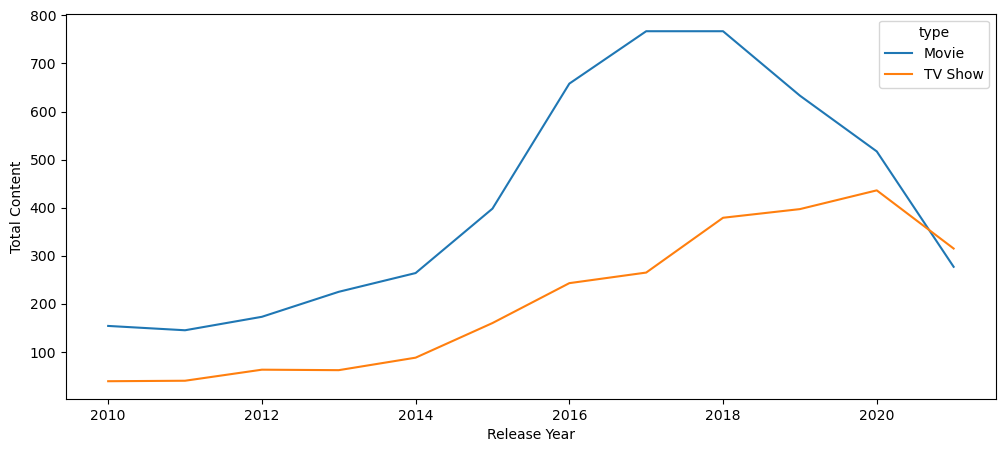

In [22]:
df2 = df[['release_year','type']]
df2 =df2.rename(columns = {'release_year': 'Release Year'})
df3 = df2.groupby(['Release Year','type']).size().reset_index(name = 'Total Content')
df3 = df3[df3['Release Year'] >= 2010]
plt.figure(figsize=(12,5))
sns.lineplot(data=df3,x= 'Release Year',y = 'Total Content',hue = 'type')

From the above line graph, it is clear that there has been a decline in the production of content for both Movies and TV shows since 2018.

<span style="font-size:15px; font-weight:bold;">Yearly Count</span>

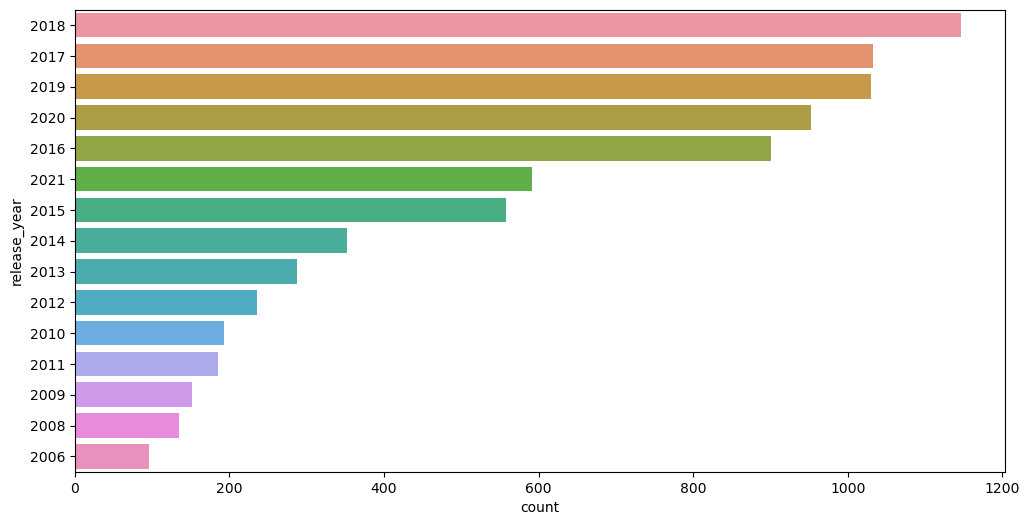

In [23]:
plt.figure(figsize= (12,6))
sns.countplot(data=df,y='release_year',order=df['release_year'].value_counts().index[0:15])
plt.show()

Highest releases in 2018 followed by 2017,2019 and 2020.

<span style="font-size:15px; font-weight:bold;">Movies Vs Tv Shows</span>

In [24]:
#movies produced in each country
df[df['type'] == 'Movie']['country'].value_counts(ascending = False ).head(10)

United States     2058
India              893
Unknown            440
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Name: country, dtype: int64

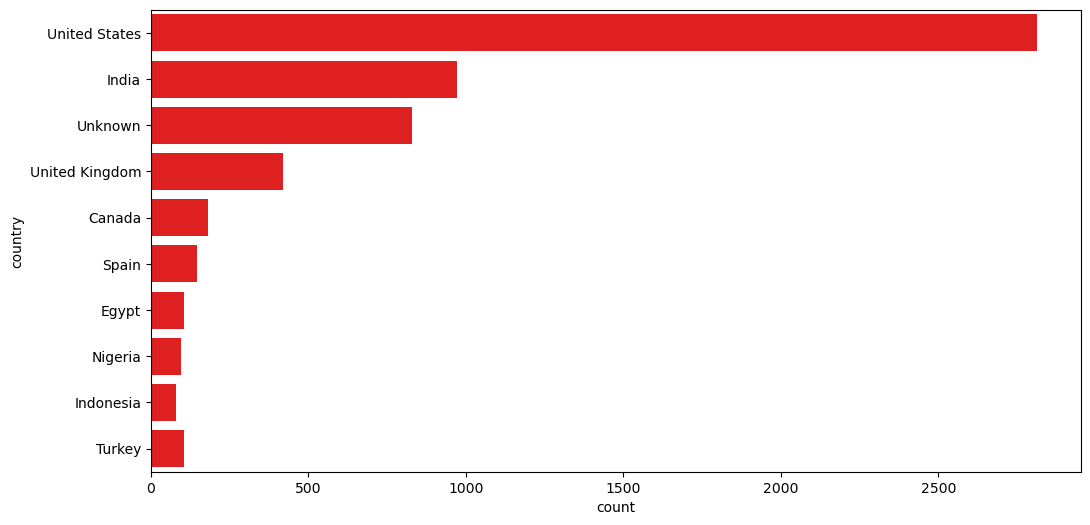

In [25]:
plt.figure(figsize= (12,6))
sns.countplot(data=df,y='country',order=df[df['type'] == 'Movie']['country'].value_counts(ascending = False ).index[0:10],color = 'r')
plt.show()

From the above graph it is clear that the United States is the largest producer of movies, followed by India and the United Kingdom,
while Indonesia and Turkey have the least movies produced.

In [26]:
#TV Shows produced in each country
df[df['type'] == 'TV Show']['country'].value_counts().head(10)

United States     754
Unknown           390
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: country, dtype: int64

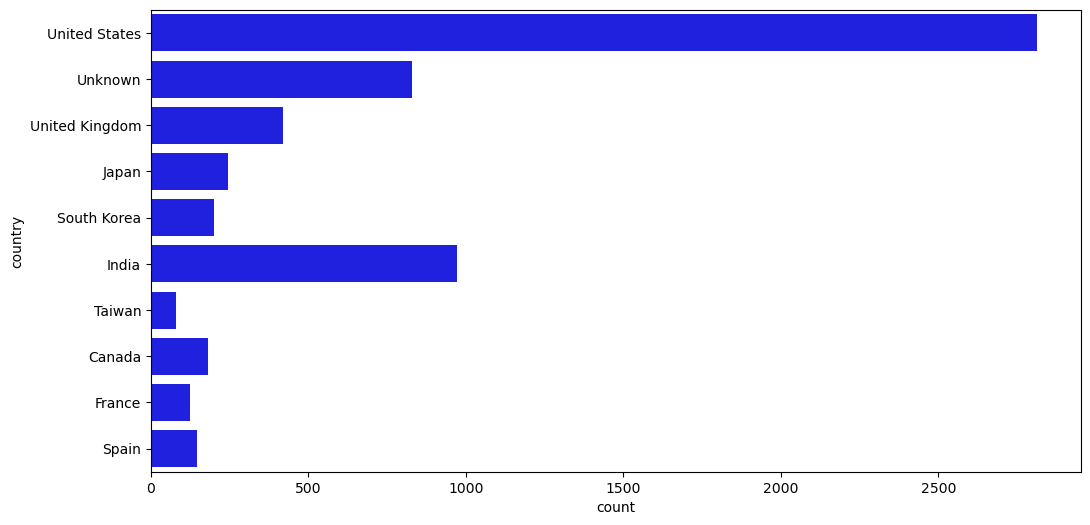

In [27]:
plt.figure(figsize= (12,6))
sns.countplot(y='country',data=df,order=df[df['type'] == 'TV Show']['country'].value_counts().index[:10],orient = 'h',color ='b' )
plt.show()

From the above graph it is observed that the United States has maximum number of TV Shows, followed by the United Kingdom and Japan,
while ustralia is  at the bottom with min number of TV Shows .

<span style="font-size:15px; font-weight:bold;">Directors & Actors Analysis</span>

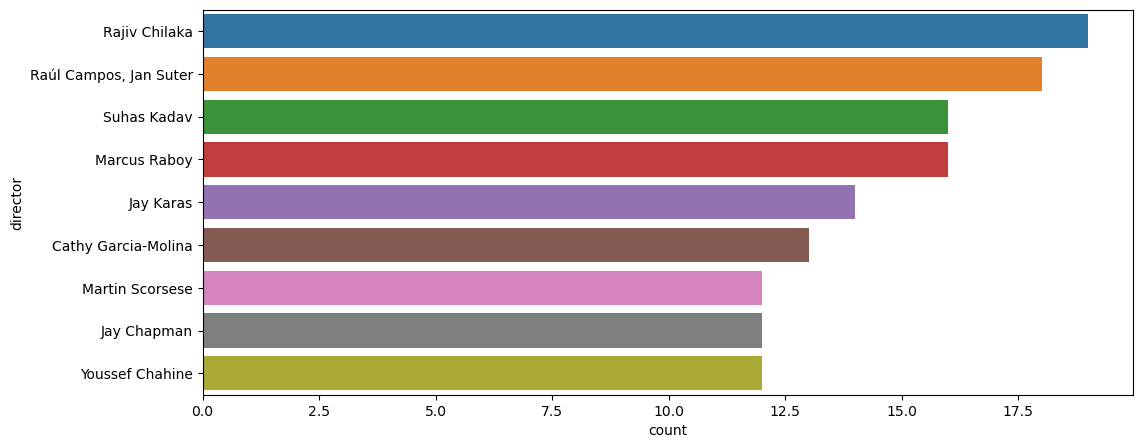

In [28]:
#Top 10 Directors
df[df['type'] == 'Movie']['director'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.countplot(data=df,y='director',order = df[df['type'] == 'Movie']['director'].value_counts().index[1:10])
plt.show()

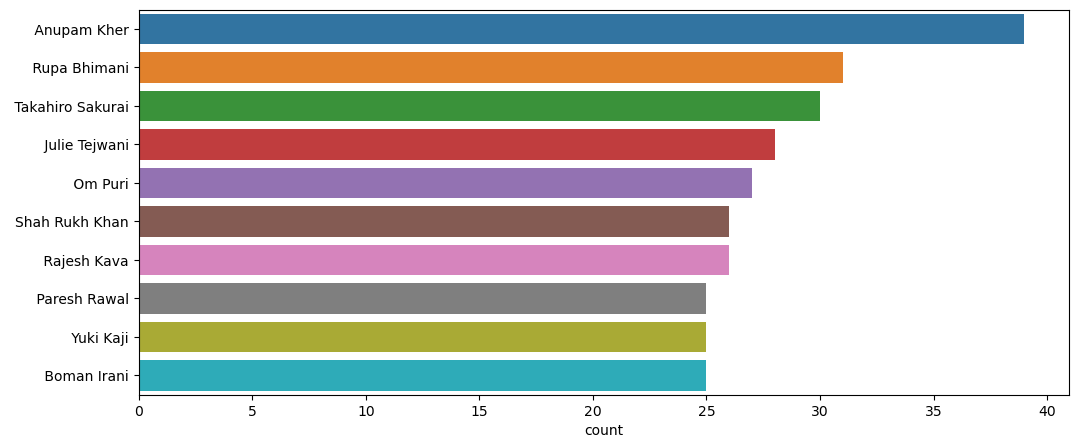

In [29]:
#Top 10 Actors
Actor = df[df['cast'] != 'Unknown Actor'].set_index('title').cast.str.split(',',expand = True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(12,5))
sns.countplot(y=Actor,order=Actor.value_counts().index[:10])
plt.show()

Anupam Kher is the top actor who has appeared in the most films, followed by Rupa Bhimani and Takahiro Sukurai, 
according to the top 10 actors mentioned in the graph above.

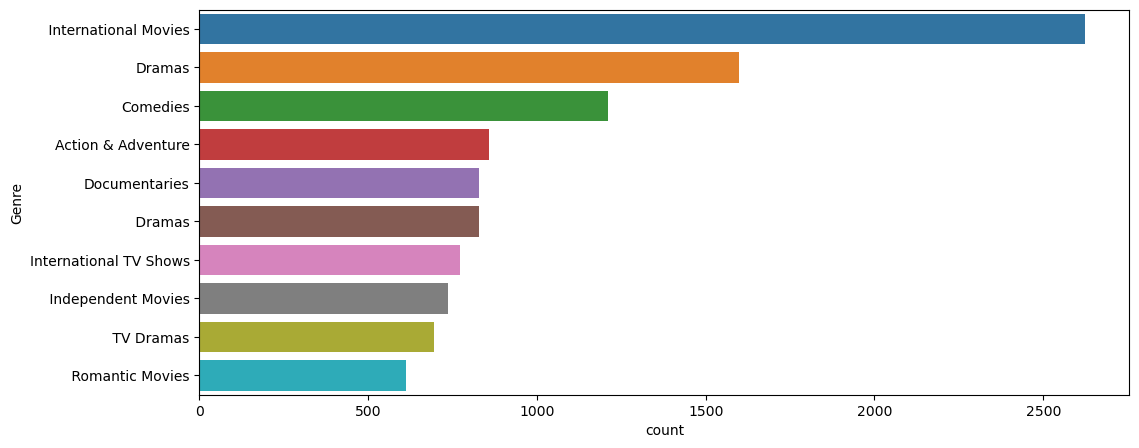

In [30]:
#Top 10 Genre
Genre = df.set_index('title').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(12,5))
sns.countplot(data=df,y=Genre,order=Genre.value_counts().index[:10])
plt.ylabel('Genre')
plt.show()

The graph above makes it evident that viewerss from throughout the world strongly recommend the International Movies category.

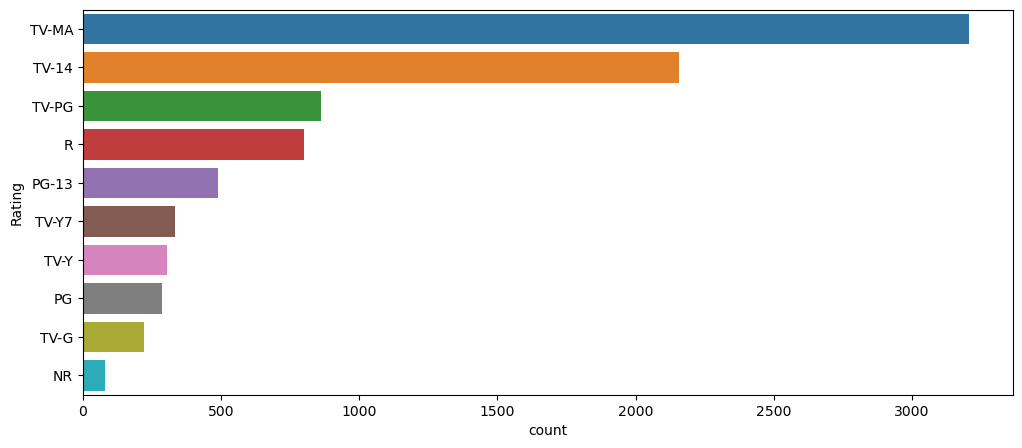

In [31]:
#Top Rated Movies
ratings = df['rating'].value_counts()
plt.figure(figsize=(12,5))
sns.countplot(data=df,y='rating',order=ratings.index[:10])
plt.ylabel('Rating')
plt.show()

From the above graph it is clearly visible that highest count of content in Netflix is relelated to TV-MA(MA- Mature Audience aged 18 or above) followedd by TV-14(individuals above 14 years of age ) and TV-PG(PG - Parental Guidance ,content may not be suitable for all children and may require parental guidance.)

<span style="font-size:15px; font-weight:bold;">Days the movie will be added to Netflix after the release of the movie.</span>

In [32]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'],format = '%Y') + pd.DateOffset(days=365)
df['days_to_release'] = (df['release_year']-df['date_added']).dt.days
df['days_to_release'].mode()

0    31
Name: days_to_release, dtype: int64

From the above calculations, it was observed that after the release of a movie, it took approximately 396 days to add it to Netflix.

<span style="font-size:15px; font-weight:bold;">Recommendations</span>
1. Netfix should produce more movies as there is is always high demand of movies.
2. International films are in great demand, so Netflix need to give them first consideration.
3. Netflix should concentrate more on promoting its content in India and the United Kingdom since both of these markets experienced tremendous consumer growth.